In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import zipfile
import os

# Path ke file ZIP di Google Drive
zip_path = "/content/drive/MyDrive/Dataset/Dataset Penyakit Daun pada Tanaman Kentang.zip"
extract_path = "/content/dataset"

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset berhasil diekstrak ke:", extract_path)


Dataset berhasil diekstrak ke: /content/dataset


In [ ]:
# Cek struktur dataset
for root, dirs, files in os.walk(extract_path):
    print(root, "->", len(files), "files")


/content/dataset -> 0 files
/content/dataset/PotatoPlants -> 0 files
/content/dataset/PotatoPlants/Potato___healthy -> 152 files
/content/dataset/PotatoPlants/Potato___Late_blight -> 1000 files
/content/dataset/PotatoPlants/Potato___Early_blight -> 1000 files
/content/dataset/PlantVillage -> 0 files
/content/dataset/PlantVillage/PlantVillage -> 0 files
/content/dataset/PlantVillage/PlantVillage/Potato___healthy -> 152 files
/content/dataset/PlantVillage/PlantVillage/Potato___Late_blight -> 1000 files
/content/dataset/PlantVillage/PlantVillage/Potato___Early_blight -> 1000 files


In [ ]:
import tensorflow as tf


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras import layers, models

# Definisikan model CNN
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),  # Normalisasi pixel
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # 3 kelas output
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Menampilkan struktur model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,                 # Dataset training
    validation_data=val_dataset,   # Dataset validasi
    epochs=10                      # Jumlah epoch (bisa disesuaikan)
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5621 - loss: 0.8400 - val_accuracy: 0.8581 - val_loss: 0.3814
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8582 - loss: 0.3536 - val_accuracy: 0.9186 - val_loss: 0.2273
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9406 - loss: 0.1769 - val_accuracy: 0.9302 - val_loss: 0.1943
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9513 - loss: 0.1358 - val_accuracy: 0.9023 - val_loss: 0.2203
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9269 - loss: 0.1659 - val_accuracy: 0.9419 - val_loss: 0.1530
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9662 - loss: 0.0872 - val_accuracy: 0.9488 - val_loss: 0.1252
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9610 - loss: 0.0886 - val_accuracy: 0.9558 - val_loss: 0.1053
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9770 - loss: 0.0504 - val_accuracy: 0.9488 - val_loss:

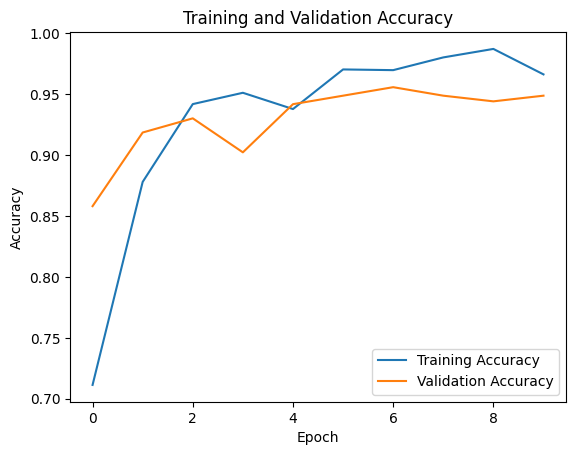

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


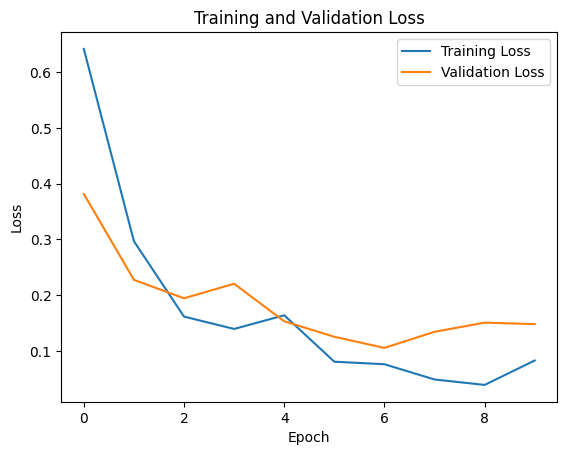

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/model_daun.keras')  # Format Keras terbaru
print("Model telah disimpan dalam format .keras.")


Model telah disimpan dalam format .keras.
